In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    
    # First, inspect if there is a transcript element, then adjust based on page structure.
    # Some pages may have different class names or IDs for the content.
    
    # Try finding content using an alternative selector (this is just an example).
    text = soup.find_all('p')  # Collect all paragraph elements (common structure)
    
    # Filter out the paragraphs if they don't seem like actual content (if needed).
    # For example, skip introductory paragraphs or metadata.
    content = [p.text.strip() for p in text if len(p.text.strip()) > 50]  # Adjust length condition as necessary

    print(f"Scraping from: {url}")
    return content

urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/gary-gulman-the-great-depresh-transcript/',
        'https://scrapsfromtheloft.com/comedy/roseanne-barr-cancel-this-transcript/',
        
        'https://scrapsfromtheloft.com/comedy/leanne-morgan-im-every-woman-transcript/',
        'https://scrapsfromtheloft.com/comedy/matt-rife-matthew-steven-rife-transcript/',
        'https://scrapsfromtheloft.com/comedy/dylan-moran-what-it-is-transcript/',
        'https://scrapsfromtheloft.com/comedy/jacqueline-novak-get-on-your-knees-transcript/',
        'https://scrapsfromtheloft.com/comedy/kelsey-cook-the-hustler-transcript/',
        
        'https://scrapsfromtheloft.com/comedy/kevin-bridges-overdue-catch-up-transcript/',
        'https://scrapsfromtheloft.com/comedy/vir-das-losing-it-transcript/'

        ]

# Comedian names
       
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe','gary','roseanne','leanne','matt','dylan','jacqueline','kelsey','kevin','vir']
# Request transcripts (takes a few minutes to run)

# # Save the result with pickle if needed
# with open("transcripts.pkl", "wb") as f:
#     pickle.dump(transcripts, f)


In [2]:
# Request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]


Scraping from: http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
Scraping from: http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
Scraping fro

In [3]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [4]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [5]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe', 'gary', 'roseanne', 'leanne', 'matt', 'dylan', 'jacqueline', 'kelsey', 'kevin', 'vir'])

In [6]:
# More checks
data['vir'][:2]

['I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you guys excited, yeah? All right. Well, my name is Vir Das. We’re gonna have such a good time tonight. I’m so excited. It’s gonna be delightful. Oh, this is how I talk now. I just thought it was time to really embrace my roots, you know, and to make my comedy more authentically Indian. And really, what could be more Indian than a fake American accent? I don’t think you understand. I have an opportunity to make history tonight, guys. I can. I can be the first ever Indian who comes to California… and then leaves. That’s never happened before. Because you guys are sticking around. Until they kick you out. Which, going by the news, is about three weeks from now.',
 'Now, I used to work in America in the year 2002. It didn’t go very well, so I left for browner pastures. And then, honestly, I didn’t think about you guys for 15 years. Because, honestly

In [7]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [8]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [9]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [10]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [11]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Get the best articles once a week directly to your inbox!
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
dylan,"Dylan Moran’s What It Is (2009) offers a sweeping exploration of human foibles, societal observations, and the complexities of life through the le..."
gary,"Gary Gulman‘s 2019 HBO stand-up comedy special, The Great Depresh, is a poignant and hilarious exploration of his lifelong struggles with depressi..."
hasan,Get the best articles once a week directly to your inbox!
jacqueline,"In “Get on Your Knees,” Jacqueline Novak transcends the typical stand-up comedy show by delivering a unique blend of personal anecdotes and intell..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."


In [12]:
# Let's take a look at the transcript for Vir Das
data_df.transcript.loc['vir']

'I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you guys excited, yeah? All right. Well, my name is Vir Das. We’re gonna have such a good time tonight. I’m so excited. It’s gonna be delightful. Oh, this is how I talk now. I just thought it was time to really embrace my roots, you know, and to make my comedy more authentically Indian. And really, what could be more Indian than a fake American accent? I don’t think you understand. I have an opportunity to make history tonight, guys. I can. I can be the first ever Indian who comes to California… and then leaves. That’s never happened before. Because you guys are sticking around. Until they kick you out. Which, going by the news, is about three weeks from now. Now, I used to work in America in the year 2002. It didn’t go very well, so I left for browner pastures. And then, honestly, I didn’t think about you guys for 15 years. Because, honestly, the

In [13]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation, and remove words containing numbers.'''
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside square brackets
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Lambda function for applying the cleaning
round1 = lambda x: clean_text_round1(x)


In [14]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,get the best articles once a week directly to your inbox
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
dylan,dylan moran’s what it is offers a sweeping exploration of human foibles societal observations and the complexities of life through the lens of st...
gary,gary gulman‘s hbo standup comedy special the great depresh is a poignant and hilarious exploration of his lifelong struggles with depression it’s...
hasan,get the best articles once a week directly to your inbox
jacqueline,in “get on your knees” jacqueline novak transcends the typical standup comedy show by delivering a unique blend of personal anecdotes and intellec...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...


In [15]:
import re
import string

def clean_text_round2(text):
    '''
    Get rid of additional punctuation, non-sensical text,
    and clean up redundant whitespace or non-printable characters.
    '''
    text = clean_text_round1(text)  # Start with the first round of cleaning
    text = re.sub(r'[‘’“”…]', '', text)  # Remove special quotation marks and ellipses
    text = re.sub(r'\n', ' ', text)  # Replace newlines with spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing whitespace
    return text
round2 = lambda x: clean_text_round2(x)

In [16]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the greate...
bo,get the best articles once a week directly to your inbox
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
dylan,dylan morans what it is offers a sweeping exploration of human foibles societal observations and the complexities of life through the lens of stan...
gary,gary gulmans hbo standup comedy special the great depresh is a poignant and hilarious exploration of his lifelong struggles with depression its no...
hasan,get the best articles once a week directly to your inbox
jacqueline,in get on your knees jacqueline novak transcends the typical standup comedy show by delivering a unique blend of personal anecdotes and intellectu...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appreciate...


In [17]:
# Let's take a look at our dataframe
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Get the best articles once a week directly to your inbox!
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
dylan,"Dylan Moran’s What It Is (2009) offers a sweeping exploration of human foibles, societal observations, and the complexities of life through the le..."
gary,"Gary Gulman‘s 2019 HBO stand-up comedy special, The Great Depresh, is a poignant and hilarious exploration of his lifelong struggles with depressi..."
hasan,Get the best articles once a week directly to your inbox!
jacqueline,"In “Get on Your Knees,” Jacqueline Novak transcends the typical stand-up comedy show by delivering a unique blend of personal anecdotes and intell..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."


In [18]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Dylan Moran','Gary Gulman','Hasan Minhaj','Jacqueline Novak',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Kelsey Cook','Kevin Bridges','Leanne Morgan','Louis C.K.', 'Matt Rife', 'Mike Birbiglia', 'Ricky Gervais','Roseanne Barr','Vir Das']

data_df['full_name'] = full_names
data_df



,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Get the best articles once a week directly to your inbox!,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
dylan,"Dylan Moran’s What It Is (2009) offers a sweeping exploration of human foibles, societal observations, and the complexities of life through the le...",Dylan Moran
gary,"Gary Gulman‘s 2019 HBO stand-up comedy special, The Great Depresh, is a poignant and hilarious exploration of his lifelong struggles with depressi...",Gary Gulman
hasan,Get the best articles once a week directly to your inbox!,Hasan Minhaj
jacqueline,"In “Get on Your Knees,” Jacqueline Novak transcends the typical stand-up comedy show by delivering a unique blend of personal anecdotes and intell...",Jacqueline Novak
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies


In [34]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [19]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming data_clean.transcript is a Pandas Series containing the cleaned transcripts
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)

# Use get_feature_names_out() instead of get_feature_names()
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Ensure the DataFrame index matches the original data_clean index
data_dtm.index = data_clean.index

data_dtm


,aa,aaaaah,aaah,aah,abandon,abandoned,abc,abcs,abdomen,abducted,...,zone,zoning,zoo,zoom,zoomed,zuckerberg,zuzus,zyprexa,éclair,éponine
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
bo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dylan,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
gary,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jacqueline,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,1
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [21]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming data_clean.transcript is a Pandas Series containing the cleaned transcripts
cv = CountVectorizer(
    stop_words='english',  # Exclude common English stop words
    ngram_range=(1, 2),    # Include both unigrams and bigrams
    min_df=0.2,              # Include terms that appear in at least 2 documents
    max_df=0.5            # Exclude terms that appear in more than 50% of documents
)

# Transform the cleaned transcripts into a document-term matrix
data_cv = cv.fit_transform(data_clean.transcript)

# Create a DataFrame from the DTM
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Ensure the DataFrame index matches the original data_clean index
data_dtm.index = data_clean.index

# Display the document-term matrix
print(data_dtm)


            abandoned  abc  abducted  ability  abortion  absolute  absolutely  \
ali                 0    1         0        0         0         0           0   
anthony             0    0         0        0         2         0           0   
bill                0    0         0        0         0         1           3   
bo                  0    0         0        0         0         0           0   
dave                0    0         0        0         0         0           0   
dylan               0    0         0        1         0         0           2   
gary                0    0         1        0         0         1           2   
hasan               0    0         0        0         0         0           0   
jacqueline          0    0         0        1         0         0           1   
jim                 0    0         0        0         0         0           0   
joe                 0    0         0        0         0         0           0   
john                0    0  

In [ ]:
# 2nd assignment->

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,dylan,gary,hasan,jacqueline,jim,...,john,kelsey,kevin,leanne,louis,matt,mike,ricky,roseanne,vir
aa,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
aaaaah,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('wanna', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('theyre', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('just', 30),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('people', 23),
  ('guys', 23),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('think', 18),
  ('grandma', 18),
  ('thing', 17),
  ('yeah', 17),
  ('time', 17),
  ('jokes', 17),
  ('school', 16),
  ('okay', 16),
  ('did', 16),
  ('good', 16),
  ('ive', 15),
  ('baby', 15),
  ('gonna', 15)],
 

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, wanna, oh
---
anthony
im, like, know, dont, joke, got, thats, said, just, anthony, say, day, people, guys
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
articles, directly, inbox, week, best, poop, ponder, ponytail, poo, poodles, pool, poom, aa, polls
---
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, fuck, thats, fucking
---
dylan
know, people, dont, like, just, cause, im, theyre, think, going, youre, look, really, men
---
gary
im, just, like, oh, got, time, really, remember, know, said, dont, went, feel, going
---
hasan
articles, directly, inbox, week, best, poop, ponder, ponytail, poo, poodles, pool, poom, aa, polls
---
jacqueline
know, like, just, im, blow, dont, penis, job, youre, mean, thats, way, cause, think
---
jim
like, im, dont, right, fucking, went, know, just, youre, people, thats, day, oh, think
---
joe
like, people, j

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'dude',
 'theyre',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'just',
 'anthony',
 'say',
 'day',
 'people',
 'guys',
 'tell',
 'youre',
 'right',
 'think',
 'grandma',
 'thing',
 'yeah',
 'time',
 'jokes',
 'school',
 'okay',
 'did',
 'good',
 'ive',
 'baby',
 'gonna',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'theres',
 'let',
 'little',
 'articles',
 'directly',
 'inbox',
 'week',
 'best',
 'poop',
 'ponder',
 'ponytail',
 'poo',
 'poodles',
 'pool',
 'poom',
 'aa',
 'polls',
 'pooped',
 'poor'

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 19),
 ('im', 19),
 ('know', 19),
 ('just', 19),
 ('dont', 19),
 ('thats', 19),
 ('people', 18),
 ('youre', 17),
 ('right', 17),
 ('time', 16),
 ('got', 15),
 ('gonna', 14),
 ('think', 14),
 ('oh', 11),
 ('yeah', 11),
 ('said', 11),
 ('say', 10),
 ('going', 10),
 ('hes', 9),
 ('theyre', 9),
 ('really', 9),
 ('shit', 8),
 ('cause', 8),
 ('day', 8),
 ('thing', 8),
 ('good', 8),
 ('want', 8),
 ('did', 7),
 ('fucking', 7),
 ('fuck', 7),
 ('didnt', 7),
 ('ive', 6),
 ('theres', 6),
 ('little', 6),
 ('went', 6),
 ('guys', 5),
 ('man', 5),
 ('mean', 5),
 ('life', 5),
 ('okay', 4),
 ('look', 4),
 ('years', 4),
 ('lot', 3),
 ('women', 3),
 ('god', 3),
 ('tell', 3),
 ('dude', 3),
 ('make', 3),
 ('come', 3),
 ('feel', 3),
 ('kind', 3),
 ('goes', 3),
 ('kids', 3),
 ('big', 3),
 ('ok', 2),
 ('gotta', 2),
 ('husband', 2),
 ('need', 2),
 ('joke', 2),
 ('school', 2),
 ('baby', 2),
 ('guy', 2),
 ('let', 2),
 ('articles', 2),
 ('directly', 2),
 ('inbox', 2),
 ('week', 2),
 ('best', 2),
 ('poop',

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'people',
 'youre',
 'right',
 'time',
 'got',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said',
 'say',
 'going',
 'hes',
 'theyre',
 'really',
 'shit',
 'cause',
 'day',
 'thing',
 'good',
 'want',
 'did',
 'fucking',
 'fuck',
 'didnt']

In [9]:
import pandas as pd
import pickle
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))  # Ensure it's a list

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)

# Convert to DataFrame
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle the vectorizer and document-term matrix for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


In [10]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
# !pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)



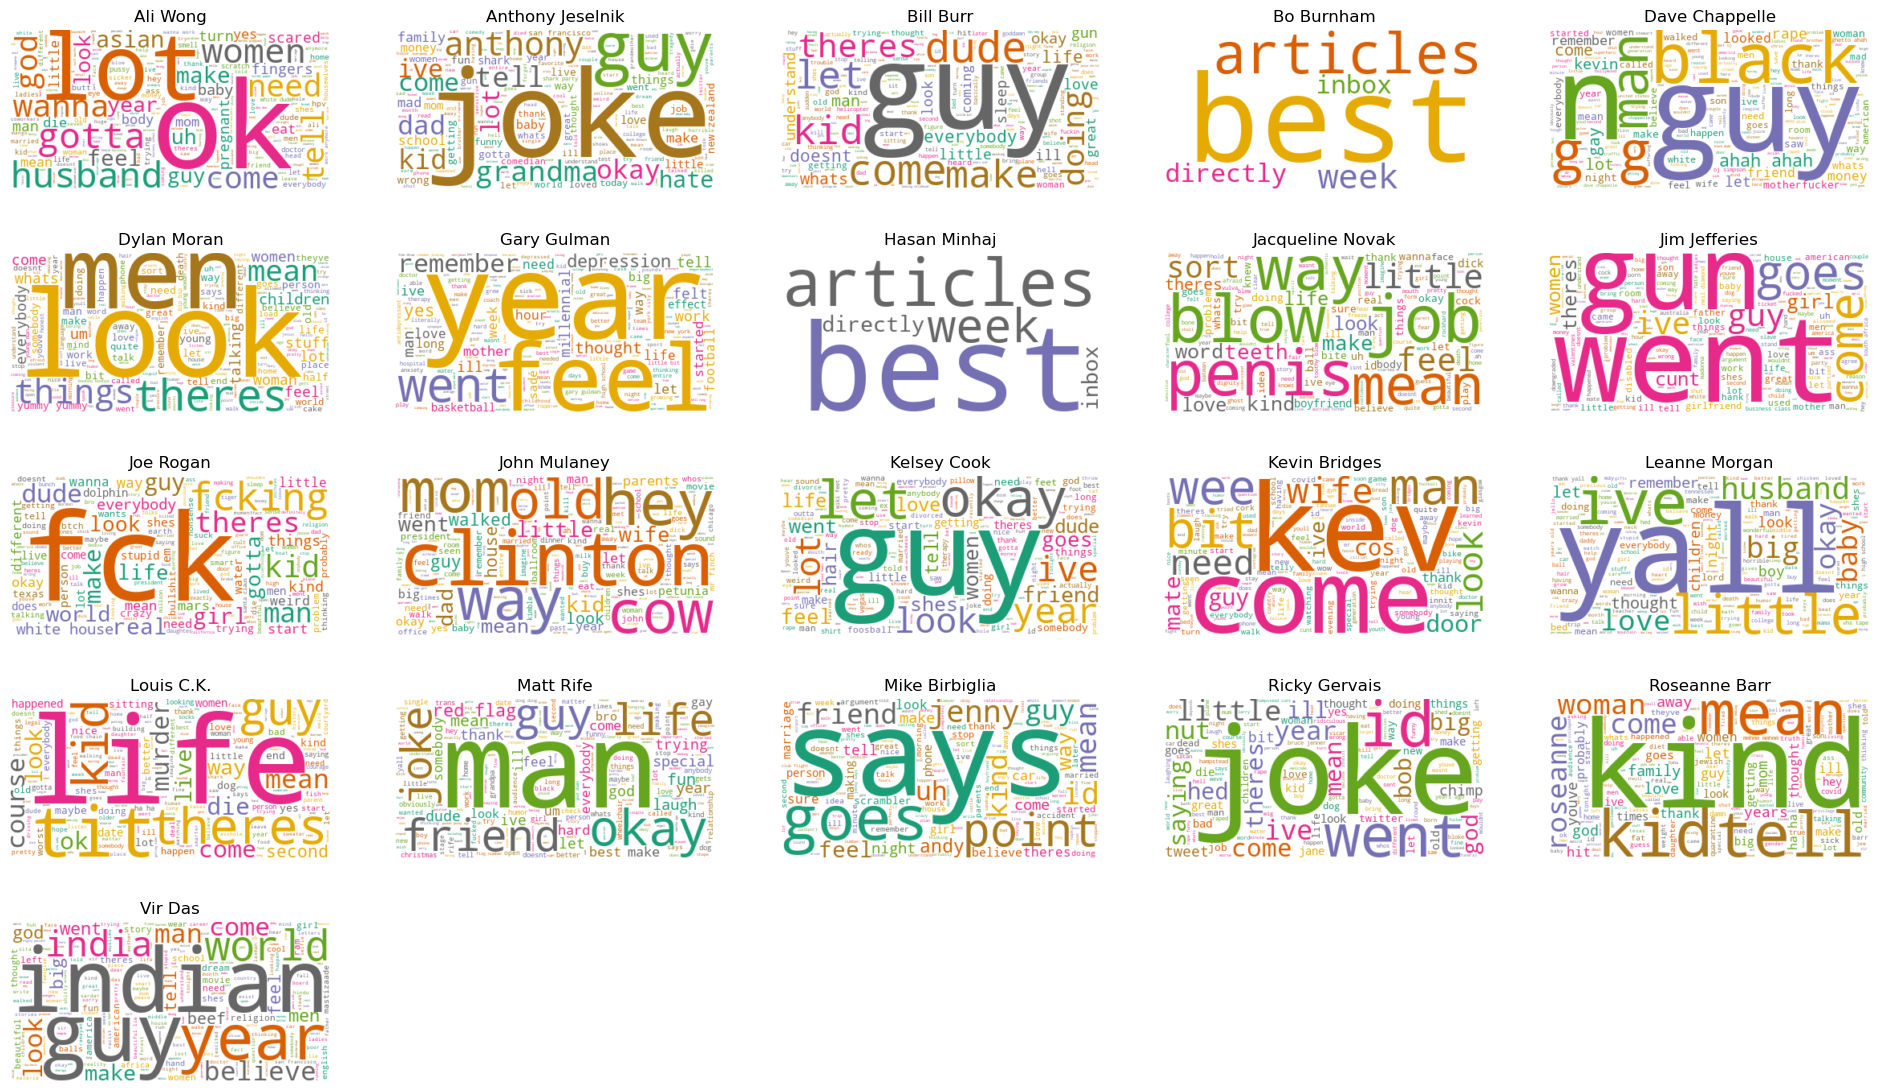

In [15]:

# Reset the output dimensions
import matplotlib.pyplot as plt

# Reset the output dimensions
plt.rcParams['figure.figsize'] = [24, 14]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Dylan Moran','Gary Gulman','Hasan Minhaj','Jacqueline Novak',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Kelsey Cook','Kevin Bridges','Leanne Morgan','Louis C.K.', 'Matt Rife', 'Mike Birbiglia', 'Ricky Gervais','Roseanne Barr','Vir Das']


# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [17]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,Bo Burnham,5
7,Hasan Minhaj,5
1,Anthony Jeselnik,1052
15,Louis C.K.,1147
14,Leanne Morgan,1359
16,Matt Rife,1360
19,Roseanne Barr,1370
9,Jim Jefferies,1373
0,Ali Wong,1397
4,Dave Chappelle,1444


In [19]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79, 65, 72, 68, 75, 70, 78, 81, 74, 69]  

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
7,Hasan Minhaj,5,5,63,0.079365
3,Bo Burnham,5,5,60,0.083333
15,Louis C.K.,1147,3421,75,45.613333
6,Gary Gulman,1618,3722,77,48.337662
19,Roseanne Barr,1370,3710,74,50.135135
1,Anthony Jeselnik,1052,3030,59,51.355932
11,John Mulaney,1462,4100,79,51.898734
20,Vir Das,1450,3723,69,53.956522
0,Ali Wong,1397,3359,60,55.983333
14,Leanne Morgan,1359,4001,68,58.838235


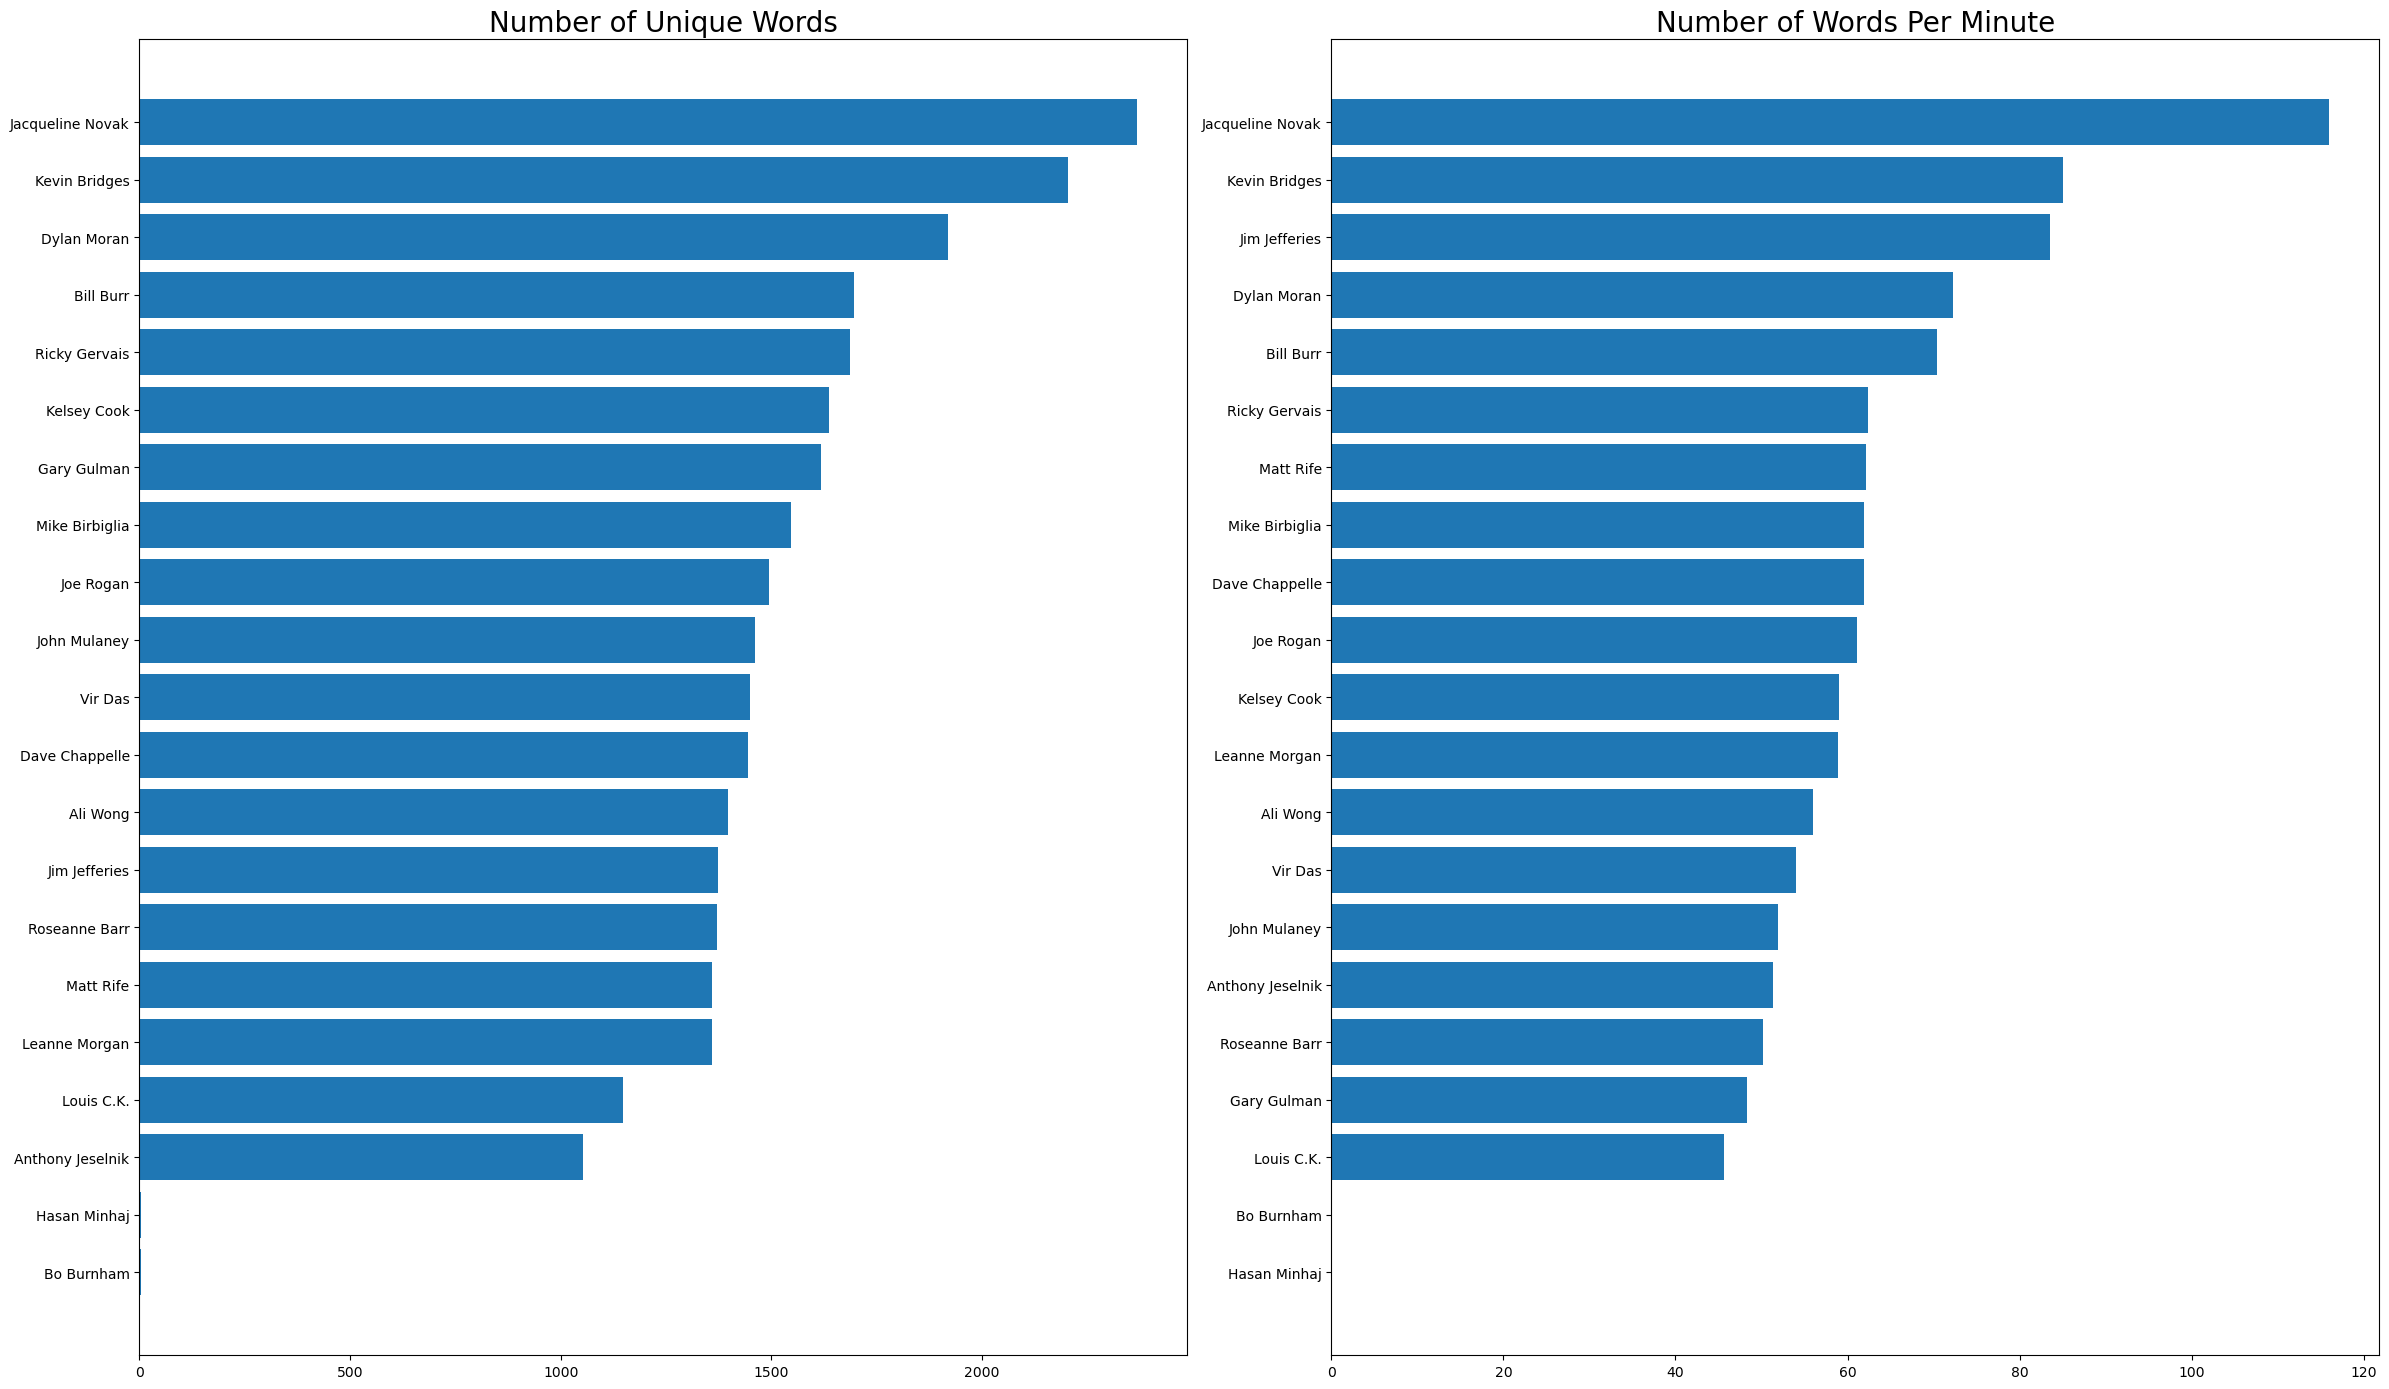

In [20]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [21]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 19),
 ('im', 19),
 ('know', 19),
 ('just', 19),
 ('dont', 19),
 ('thats', 19),
 ('people', 18),
 ('youre', 17),
 ('right', 17),
 ('time', 16),
 ('got', 15),
 ('gonna', 14),
 ('think', 14),
 ('oh', 11),
 ('yeah', 11),
 ('said', 11),
 ('say', 10),
 ('going', 10),
 ('hes', 9),
 ('theyre', 9),
 ('really', 9),
 ('shit', 8),
 ('cause', 8),
 ('day', 8),
 ('thing', 8),
 ('good', 8),
 ('want', 8),
 ('did', 7),
 ('fucking', 7),
 ('fuck', 7),
 ('didnt', 7),
 ('ive', 6),
 ('theres', 6),
 ('little', 6),
 ('went', 6),
 ('guys', 5),
 ('man', 5),
 ('mean', 5),
 ('life', 5),
 ('okay', 4),
 ('look', 4),
 ('years', 4),
 ('lot', 3),
 ('women', 3),
 ('god', 3),
 ('tell', 3),
 ('dude', 3),
 ('make', 3),
 ('come', 3),
 ('feel', 3),
 ('kind', 3),
 ('goes', 3),
 ('kids', 3),
 ('big', 3),
 ('ok', 2),
 ('gotta', 2),
 ('husband', 2),
 ('need', 2),
 ('joke', 2),
 ('school', 2),
 ('baby', 2),
 ('guy', 2),
 ('let', 2),
 ('articles', 2),
 ('directly', 2),
 ('inbox', 2),
 ('week', 2),
 ('best', 2),
 ('poop',

In [36]:
# Extend the list of profanity words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit', 'fucker', 'fucked', 'fuckers', 'fuckin', 'shitty', 'shat', 'shits', 'shitting']]

# Sum up the frequencies of F-words and S-words
data_profanity = pd.concat([
    data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fucker + data_bad_words.fucked + data_bad_words.fuckers + data_bad_words.fuckin,
    data_bad_words.shit + data_bad_words.shitty + data_bad_words.shat + data_bad_words.shits + data_bad_words.shitting
], axis=1)

# Rename columns
data_profanity.columns = ['f_word', 's_word']

# Display the dataframe
data_profanity


,f_word,s_word
ali,22,39
anthony,23,9
bill,123,68
bo,0,0
dave,72,47
dylan,53,15
gary,1,0
hasan,0,0
jacqueline,10,3
jim,123,20


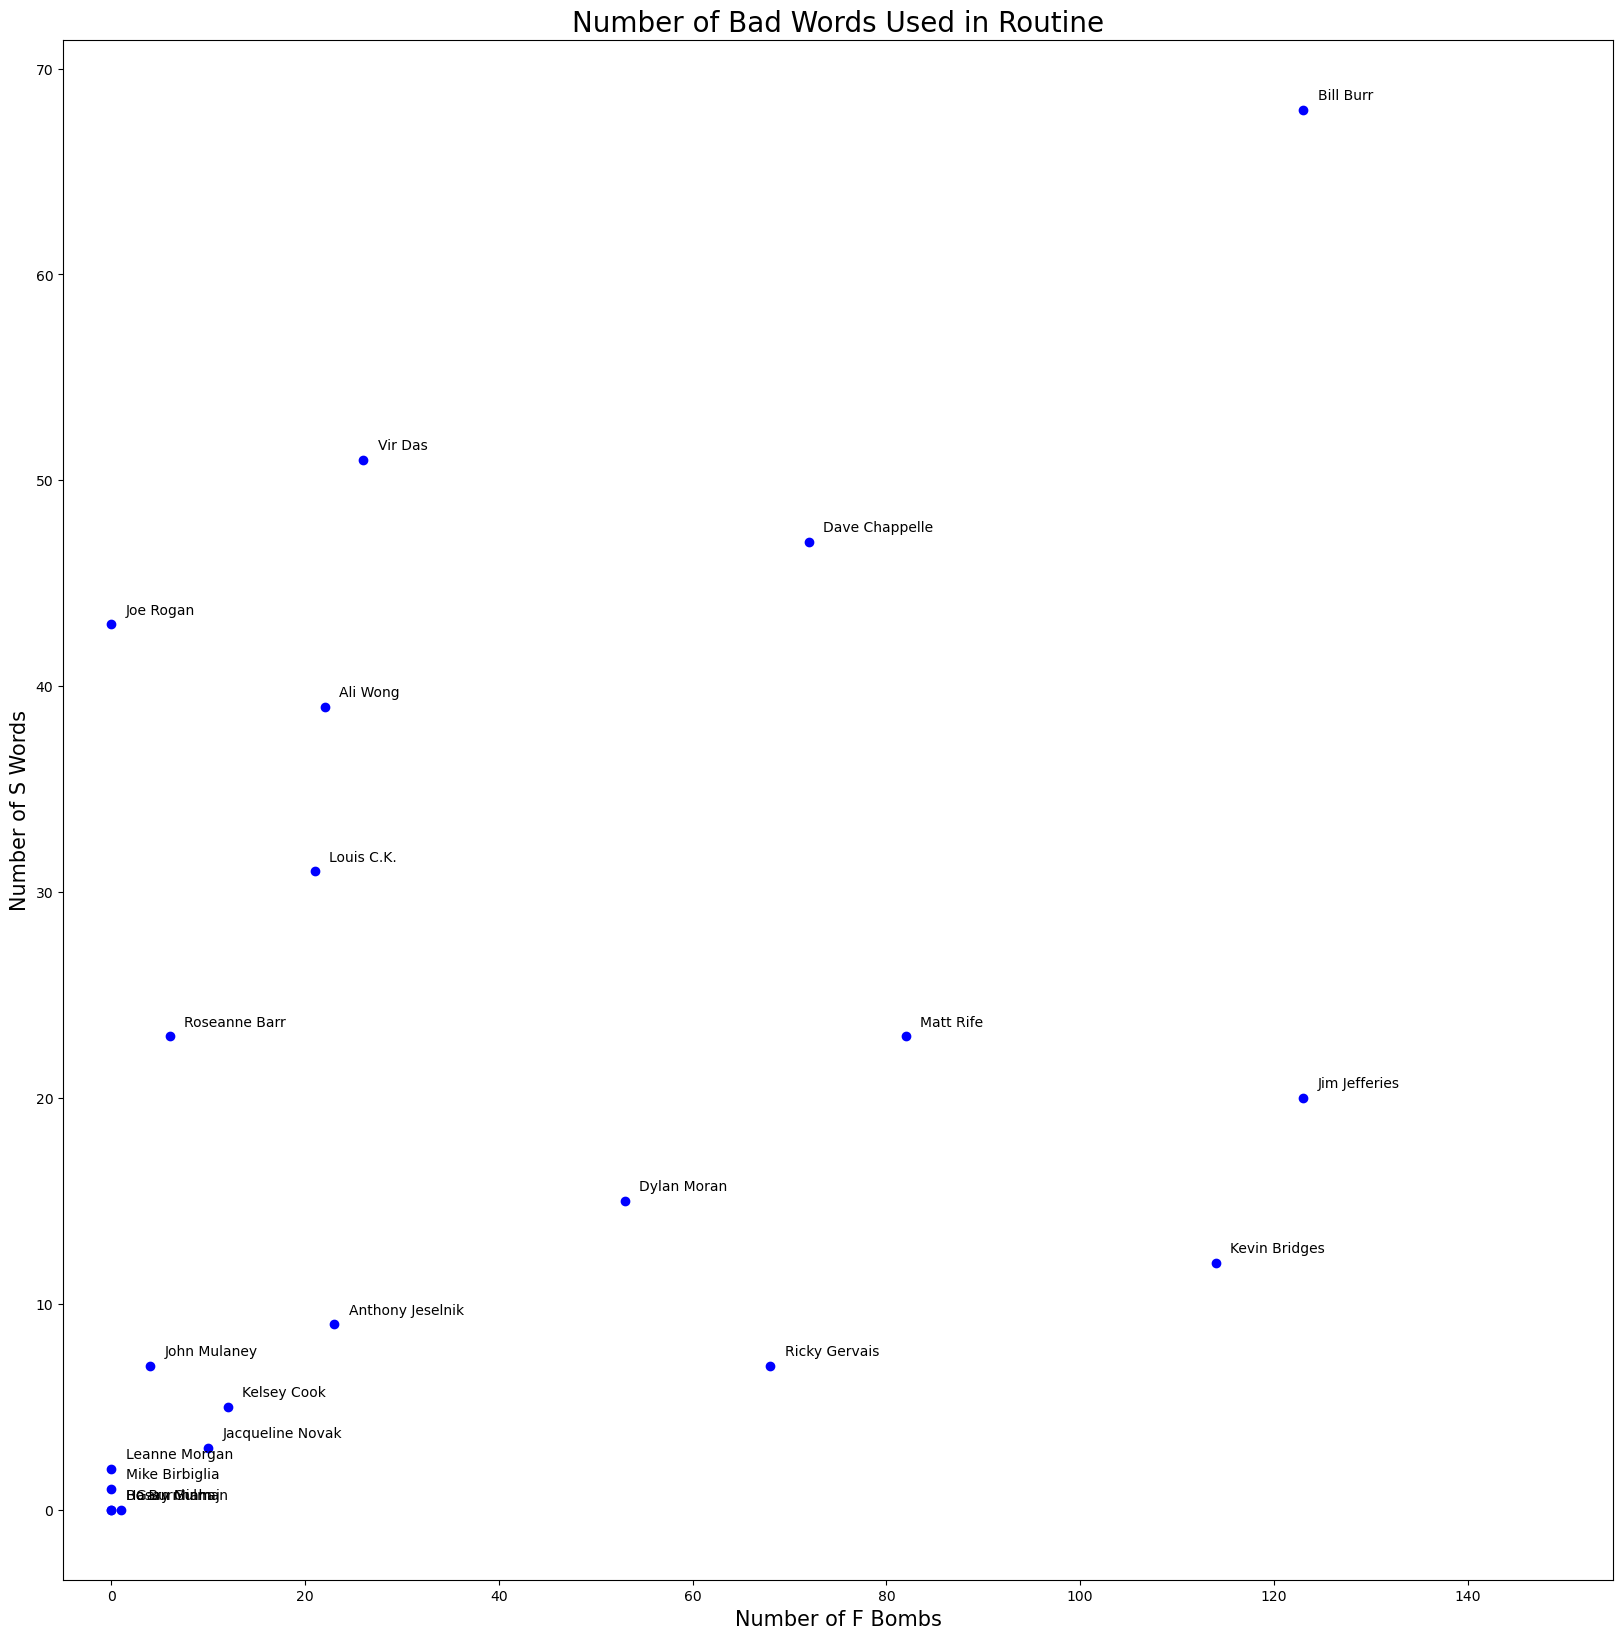

In [38]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [20, 20]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

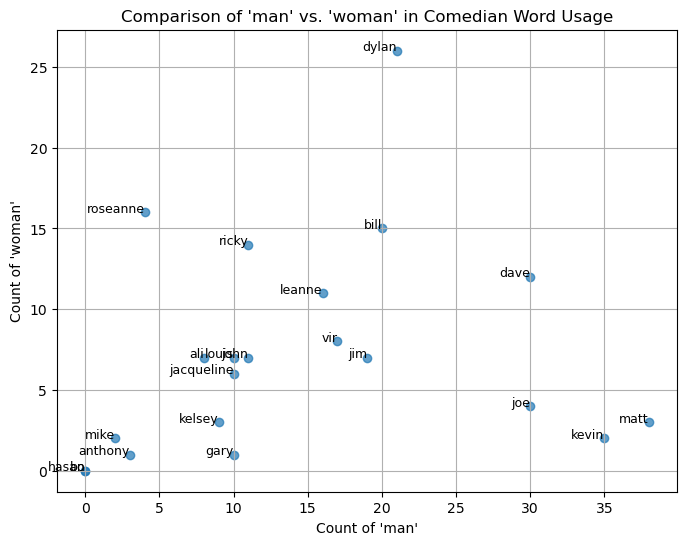

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing word counts

# Choose a pair of words to compare
word_pair = ['man', 'woman']  # Swap with ['black', 'white'], ['rich', 'poor'], etc.

# Extract relevant data
data_words = data.transpose()[word_pair]  

# Rename columns for clarity
data_words.columns = ['word1', 'word2']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_words['word1'], data_words['word2'], alpha=0.7)

# Add labels for each comedian
for i in range(len(data_words)):
    comedian = data_words.index[i]
    plt.text(data_words['word1'].iloc[i], data_words['word2'].iloc[i], comedian, fontsize=9, ha='right')

# Labels and title
plt.xlabel(f"Count of '{word_pair[0]}'")
plt.ylabel(f"Count of '{word_pair[1]}'")
plt.title(f"Comparison of '{word_pair[0]}' vs. '{word_pair[1]}' in Comedian Word Usage")
plt.grid(True)

# Show plot
plt.show()
